<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [280]:
from typing import List
import requests
import pandas as pd

#%pip install matplotlib

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    URL_Base = "https://archive-api.open-meteo.com/v1/era5?latitude={}&longitude={}&start_date={}&end_date={}&timezone=GMT&daily="
    URL_Request = URL_Base.format(latitude,longitude,start_date,end_date,features)

    for x in features: 
        URL_Request += str(x)+","
    
    URL_Request = URL_Request[:-1]
        
    print(URL_Request)
    response = requests.get(URL_Request)
    response_json = response.json()
    print(response_json)

    
    return response_json
    # add your code here

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [281]:
# add your code here

#London lat long
Lat = 51.5072
Long =0.1276
Start_date = "1950-01-01"
End_date = "1954-12-31"
Features =  ["temperature_2m_mean",'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum']
acquired_data=acquire_data(Lat,Long,Start_date,End_date,Features)
acquired_data = pd.DataFrame(acquired_data)
display(acquired_data)


https://archive-api.open-meteo.com/v1/era5?latitude=51.5072&longitude=0.1276&start_date=1950-01-01&end_date=1954-12-31&timezone=GMT&daily=temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum
{'latitude': 51.5, 'longitude': 0.1000061, 'generationtime_ms': 1.8349885940551758, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 3.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_mean': '°C', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'precipitation_sum': 'mm'}, 'daily': {'time': ['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08', '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12', '1950-01-13', '1950-01-14', '1950-01-15', '1950-01-16', '1950-01-17', '1950-01-18', '1950-01-19', '1950-01-20', '1950-01-21', '1950-01-22', '1950-01-23', '1950-01-24', '1950-01-25', '1950-01-26', '1950-01-27', '1950-01-28', '1950-01-29', '1950-01-30', '1950-01-31', '1950-0

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units,daily
time,51.5,0.100006,1.834989,0,GMT,GMT,3.0,iso8601,"[1950-01-01, 1950-01-02, 1950-01-03, 1950-01-0..."
temperature_2m_mean,51.5,0.100006,1.834989,0,GMT,GMT,3.0,°C,"[1.5, 6.8, 10.5, 9.4, 8.2, 6.5, 9.3, 7.1, 5.8,..."
temperature_2m_max,51.5,0.100006,1.834989,0,GMT,GMT,3.0,°C,"[4.2, 10.5, 11.2, 10.6, 9.5, 9.1, 12.4, 9.6, 8..."
temperature_2m_min,51.5,0.100006,1.834989,0,GMT,GMT,3.0,°C,"[-1.6, 0.1, 10.1, 8.1, 6.0, 3.9, 7.5, 4.9, 4.1..."
precipitation_sum,51.5,0.100006,1.834989,0,GMT,GMT,3.0,mm,"[0.0, 0.0, 1.7, 0.0, 2.7, 0.8, 0.1, 0.0, 0.0, ..."


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Title'}, xlabel='x', ylabel='y'>)

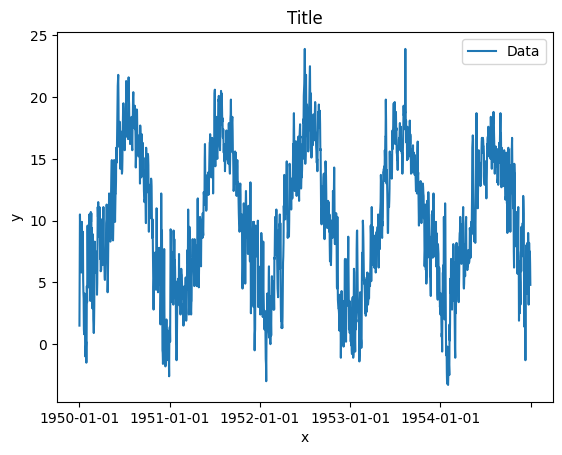

In [282]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    fig, ax = plt.subplots()
    ax.plot(x, y, label="Data")

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    ax.xaxis.set_major_locator(mdates.YearLocator())

    return fig, ax

lineplot(acquired_data["daily"]["time"],acquired_data["daily"]["temperature_2m_mean"],"Title","x","y")

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Title'}, xlabel='x', ylabel='y'>)

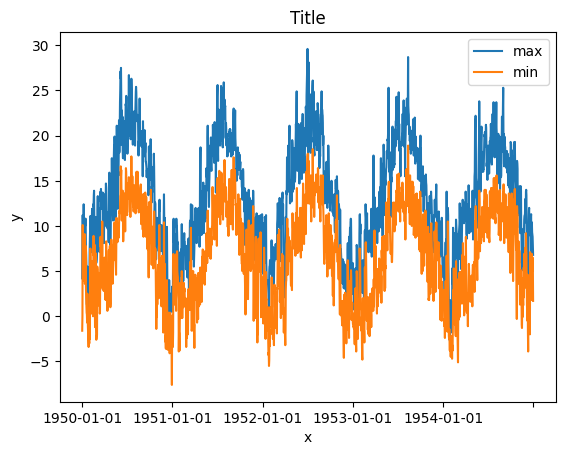

In [283]:
def mv_lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    fig, ax = plt.subplots()
    counter = 1
    for y in ys:
        ax.plot(x, y, label="Data"+str(counter))
        counter++1

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(legend)
    ax.xaxis.set_major_locator(mdates.YearLocator())

    return fig, ax

mv_lineplots(acquired_data["daily"]["time"],[acquired_data["daily"]["temperature_2m_max"],acquired_data["daily"]["temperature_2m_min"]],"Title","x","y",["max","min"])

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


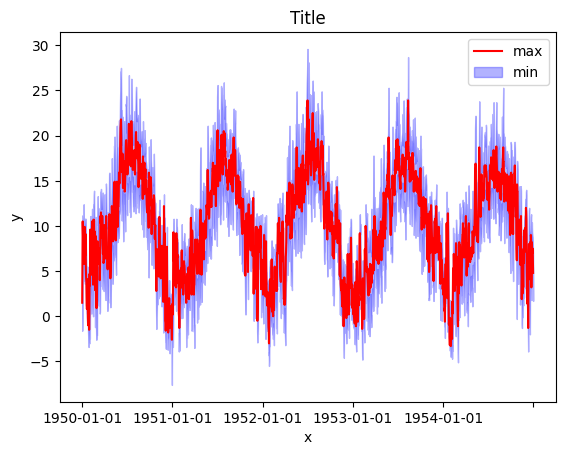

In [284]:
def advance_lineplots(x: ArrayLike, ymin:ArrayLike, ymax:ArrayLike, ymean:ArrayLike, title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    fig, ax = plt.subplots()
    counter = 1


    ax.plot(x, ymean, label="Data"+str(counter),color='red')
    ax.fill_between(x, ymin, ymax,color='blue', alpha=0.3)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(legend)

    ax.xaxis.set_major_locator(mdates.YearLocator())
advance_lineplots(acquired_data["daily"]["time"],acquired_data["daily"]["temperature_2m_min"],acquired_data["daily"]["temperature_2m_max"],acquired_data["daily"]["temperature_2m_mean"],"Title","x","y",["max","min"])

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Raw vs Normalised Data'}, xlabel='x', ylabel='y'>)

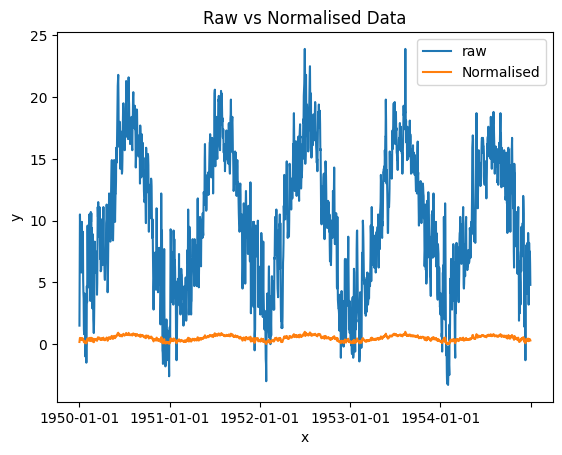

In [285]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """

    Min = min(x)
    Max = max(x)

    Normalised =[element2 /(Max-Min) for element2 in [element - Min for element in x]]

    return Normalised

x =acquired_data["daily"]["time"]
y =[acquired_data["daily"]["temperature_2m_mean"],minmax_norm(acquired_data["daily"]["temperature_2m_mean"])]

mv_lineplots(x,y,"Raw vs Normalised Data","x","y",["raw","Normalised"])
    # add your code here

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Raw vs Normalised Data'}, xlabel='x', ylabel='y'>)

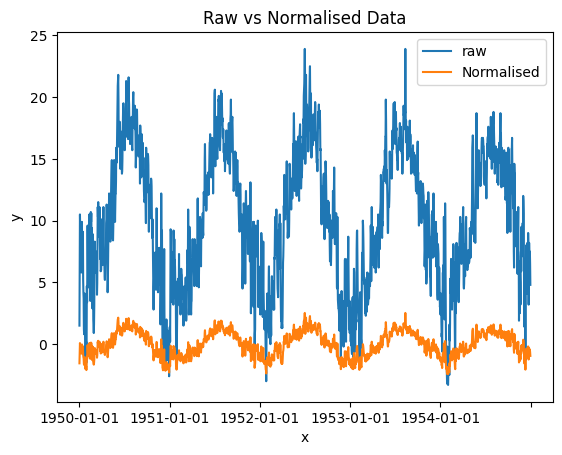

In [286]:
import statistics


def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
        
    """
    Mean = statistics.mean(x)
    Devation = statistics.stdev(x)

    Normalised =[element2 /Devation for element2 in [element - Mean for element in x]]
    return Normalised
    # add your code here


x =acquired_data["daily"]["time"]
y =[acquired_data["daily"]["temperature_2m_mean"],zscore_norm(acquired_data["daily"]["temperature_2m_mean"])]

mv_lineplots(x,y,"Raw vs Normalised Data","x","y",["raw","Normalised"])
    # add your code here

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [287]:
def zscore_outliers(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    zscore = zscore_norm(x)

    outliers = []
    for i in range (0,len(zscore)):
        if abs(zscore[i]) >= threshold:
            outliers.append(i) 
    
    return outliers
    # add your code here

outliers = zscore_outliers(acquired_data["daily"]["temperature_2m_mean"],1.5)
print(outliers)

[0, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 57, 58, 59, 153, 154, 155, 156, 157, 158, 177, 178, 179, 180, 189, 198, 199, 200, 201, 211, 216, 217, 218, 219, 220, 223, 224, 232, 233, 328, 336, 337, 338, 339, 345, 346, 347, 348, 349, 350, 351, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 391, 392, 393, 394, 421, 546, 547, 548, 555, 562, 563, 564, 565, 571, 572, 573, 576, 577, 579, 612, 613, 618, 619, 709, 710, 711, 748, 749, 751, 753, 754, 755, 756, 757, 758, 759, 762, 763, 764, 765, 769, 772, 773, 774, 776, 818, 819, 820, 821, 868, 908, 909, 910, 911, 912, 913, 916, 917, 918, 919, 920, 921, 922, 930, 931, 932, 933, 934, 936, 937, 941, 947, 948, 953, 954, 955, 966, 968, 969, 972, 973, 1052, 1054, 1057, 1058, 1059, 1063, 1066, 1068, 1069, 1070, 1071, 1072, 1078, 1079, 1091, 1094, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1107, 1108, 1109, 1114, 1115, 1116, 1118, 1119, 1132, 1133, 1134, 1138, 1139, 1140, 1141, 1142, 1240, 1271, 1272, 1274, 1275, 1276, 127

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Raw vs Normalised Data'}, xlabel='x', ylabel='y'>)

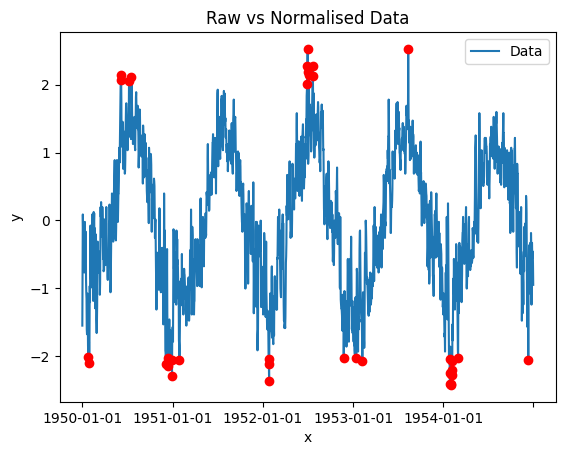

In [288]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    for i in outliers_idx:
        ax.plot(x[i],y[i],"or")

    return fig, ax
    # add your code here

x =acquired_data["daily"]["time"]
y =zscore_norm(acquired_data["daily"]["temperature_2m_mean"])
outliers = zscore_outliers(acquired_data["daily"]["temperature_2m_mean"],2)

fig, ax = lineplot(x,y,"Raw vs Normalised Data","x","y",)

mark_outliers(ax,x,y,outliers)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


5.9 14.8 8.9
-3.0 23.700000000000003


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Raw vs Normalised Data'}, xlabel='x', ylabel='y'>)

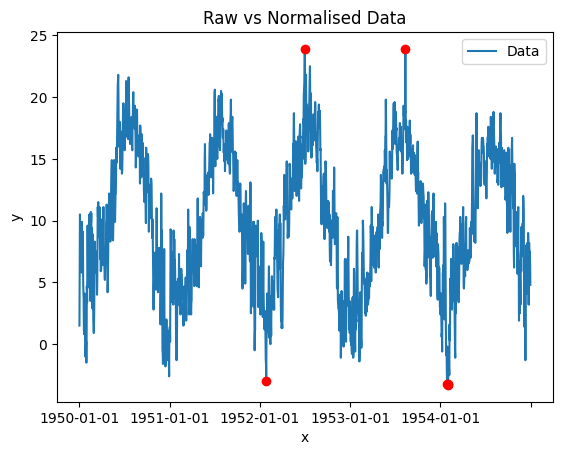

In [289]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    
    Temp = sorted(x)

    q1 = Temp[round(len(x)/4)]
    q3 = Temp[round(len(x)/1.3333333333333)]
    IQR = q3-q1
    print(q1,q3,IQR)
    lower_bound = q1 - threshold * IQR
    upper_bound = q3 + threshold * IQR
    print(lower_bound,upper_bound)

    
    outliers=[]
    for i in range (0,len(x)):
        if x[i] >= upper_bound or x[i] <= lower_bound:
            outliers.append(i) 
    
    return outliers


x =acquired_data["daily"]["time"]
y =acquired_data["daily"]["temperature_2m_mean"]
outliers = iqr_detect(acquired_data["daily"]["temperature_2m_mean"],1)

fig, ax = lineplot(x,y,"Raw vs Normalised Data","x","y",)

mark_outliers(ax,x,y,outliers)

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


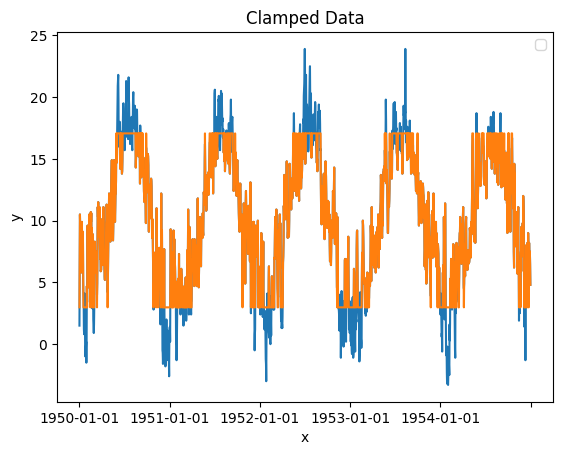

In [290]:
def zscore_clamp(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    outliers = zscore_outliers(x,threshold)
    Mean = statistics.mean(x)
    Devation = statistics.stdev(x)

    Clamped = np.array(x)
    for i in outliers:
        if Clamped[i] <= Mean:
            Clamp =-1.282*Devation+Mean
        else:
            Clamp=1.282*Devation+Mean

        Clamped[i] = Clamp
    
    return Clamped

x = acquired_data["daily"]["time"]
y = acquired_data["daily"]["temperature_2m_mean"]
y_clamp = zscore_clamp(y,1)

fig, ax = mv_lineplots(x,[y,y_clamp],"Clamped Data","x","y",[])



<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


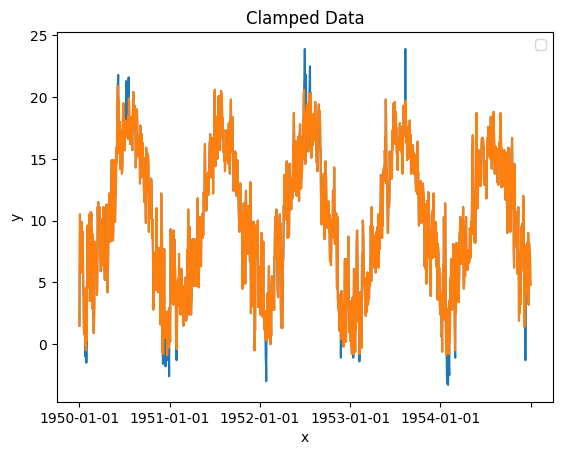

In [350]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=3, deg: int=1, buffer: int = 10) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation
        
        buffer (int): amount of data around error point to interpolate

    Returns:
        (ArrayLike): interpolated data
    """


    # add your code here
    outliers = zscore_outliers(y, threshold)
    interp = np.array(y)
    x_axis = np.linspace(0, len(interp)-1,len(interp))    


    for i in outliers:
        

        int_x= []
        int_y =[]
        count = i - buffer
        if count < 0:
            count = 0

        #used to collect data to do the interpolation on
        while True:
            #breaks if enough data is collected or run out of data
            if count >= len(x_axis) or len(int_x)> 2*buffer:
                break
            
            #if a datapoint can be used, it is
            if i != x_axis[count]:
                int_x.append(interp[count])
                int_y.append(x_axis[count])
            count+=1

        #interpolates data using the np polyfit
        coefficients = np.polyfit(int_y, int_x, deg)
        poly_function = np.poly1d(coefficients)
        changed_value = poly_function(i)
        interp[i] = changed_value


    return interp

x = acquired_data["daily"]["time"]
y = acquired_data["daily"]["temperature_2m_mean"]
y_interp = zscore_interp(x,y,2,3,40)

fig, ax = mv_lineplots(x,[y,y_interp],"Clamped Data","x","y",[])
